# Лабораторная работа № 14
## Морфологические преобразования

### Задание 8.1. 
Загрузить библиотеку numpy, файл bin.jpg и преобразовать его с помощью операций дилатация и эрозия. Выбрать ядро, размер которого равен последней цифре в номере списка группы. Здесь ядро 5×5. Выполним сначала операцию дилатации, затем и эрозии

In [1]:
import cv2
import numpy as np
import random
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('img.jpg',0)

In [3]:
kernel = np.ones((5,5), np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 1)
erosion = cv2.erode(img, kernel,iterations = 1)

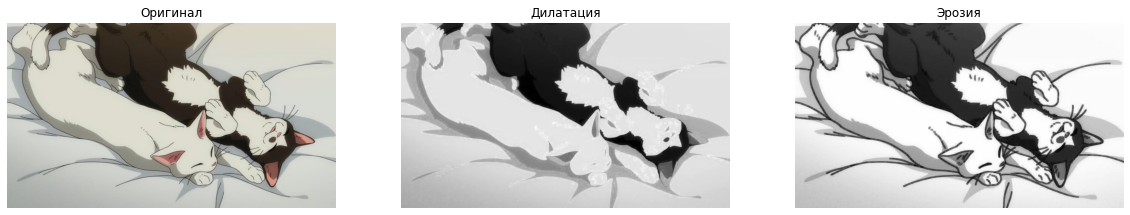

In [77]:
plt.figure(figsize=(20,15))

plt.subplot(131),
plt.imshow(img,cmap = 'gray'),plt.title("Оригинал"),
plt.axis('off')

plt.subplot(132),
plt.imshow(dilation,cmap = 'gray'),plt.title("Дилатация"),
plt.axis('off')

plt.subplot(133),
plt.imshow(erosion,cmap = 'gray'),plt.title("Эрозия"),
plt.axis('off');

### Задание 8.2. 
Для демонстрации удаления шума создать зашумленный файл, затем к зашумленному файлу применить операцию открытия.

In [29]:
image = Image.open('img.jpg')

In [30]:
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 150)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))
image.save("median.png", "JPEG")

In [45]:
image = Image.open('img.jpg')

median = cv2.imread("median.png", 1)
median = cv2.cvtColor(median,cv2.COLOR_BGR2RGB)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10, 10)) 
opening = cv2.morphologyEx(median, cv2.MORPH_OPEN, kernel)

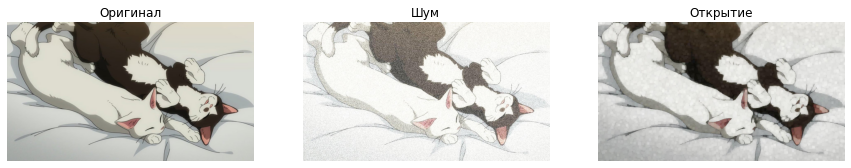

In [47]:
plt.figure(figsize=(15,15))

plt.subplot(131),
plt.imshow(image,cmap = 'gray'),plt.title("Оригинал"),
plt.axis('off')

plt.subplot(132)
plt.imshow(median, cmap='gray'),plt.title("Шум")
plt.axis('off')

plt.subplot(133)
plt.imshow(opening, cmap='gray'),plt.title("Открытие")
plt.axis('off');

### Задание 8.3. 
Трансформировать цветное изображение в полутоновое при его загрузке, к полутоновому файлу применить операцию открытия.

In [49]:
img = cv2.imread('img.jpg',0)

In [50]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))

In [51]:
opening = cv2.morphologyEx(median, cv2.MORPH_OPEN, kernel)
close = cv2.morphologyEx(median, cv2.MORPH_CLOSE, kernel)

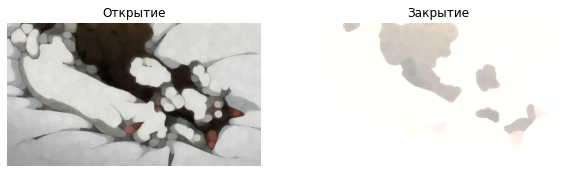

In [53]:
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(opening, cmap='gray')
plt.title("Открытие")
plt.axis('off')

plt.subplot(122)
plt.imshow(close, cmap='gray')
plt.title("Закрытие")
plt.axis('off')

plt.show();

### Задание 8.4. 
Трансформировать цветное изображение в полутоновое при его загрузке. Скопировать полутоновое изображение. К первому изображению применить операцию расширения, ко второму эрозию. Затем вычесть из расширенного изображения изображение после эрозии. Результат похож на контур объекта.


In [54]:
img = cv2.imread('img.jpg',0)
copy_img = img.copy()

In [56]:
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(img, kernel, iterations=1)
eroded_image = cv2.erode(copy_img, kernel, iterations=1)

result_image = dilated_image - eroded_image

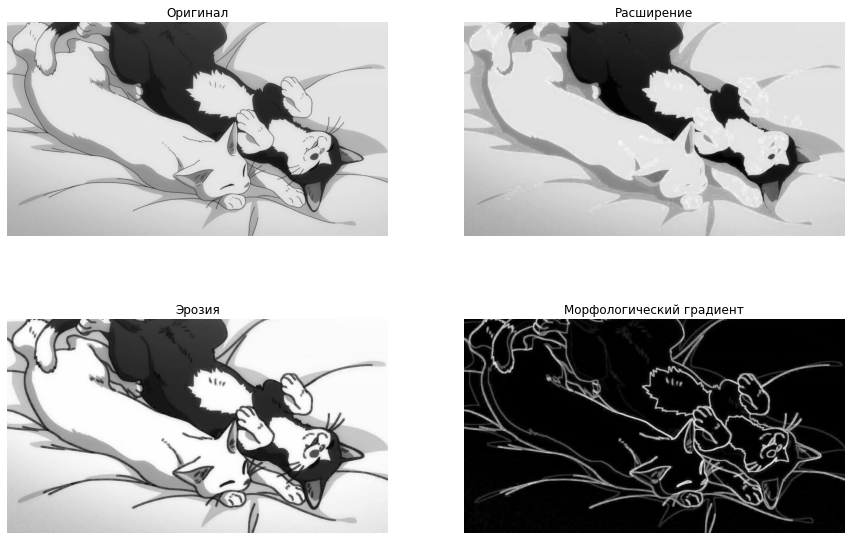

In [59]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title("Оригинал")
plt.axis('off')

plt.subplot(222)
plt.imshow(dilated_image, cmap='gray')
plt.title("Расширение")
plt.axis('off')

plt.subplot(223)
plt.imshow(eroded_image, cmap='gray')
plt.title("Эрозия")
plt.axis('off')

plt.subplot(224)
plt.imshow(result_image, cmap='gray')
plt.title("Морфологический градиент")
plt.axis('off')

plt.show()

### Задание 8.5. 
Применить операцию цилиндр к изображению, размер ядра равен 40 + №, № – номер по списку группы. (№29, 40 + 29 = 69)

In [64]:
img = cv2.imread('img.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [65]:
result = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, (69,69))

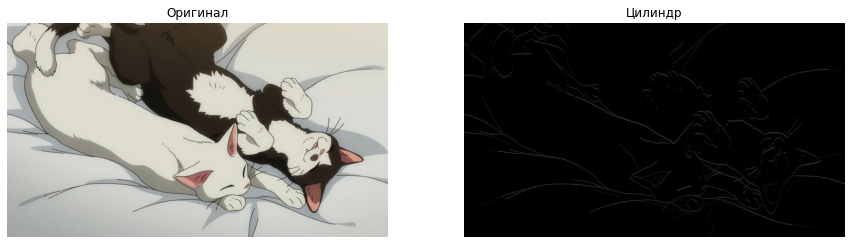

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(image, cmap="gray")
plt.title("Оригинал")
plt.axis('off')

plt.subplot(122)
plt.imshow(result, cmap="gray")
plt.title("Цилиндр")
plt.axis('off')

plt.show();

### Задание 8.6. 
Применить операцию черная шляпа к изображению, размер ядра равен 40 + №, № – номер по списку группы

In [68]:
result = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, (69,69))

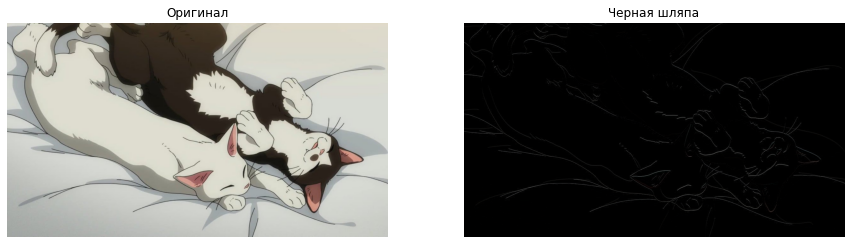

In [70]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(image, cmap="gray")
plt.title("Оригинал")
plt.axis('off')

plt.subplot(122)
plt.imshow(result, cmap="gray")
plt.title("Черная шляпа")
plt.axis('off')

plt.show();

### Задание 8.7. 
Изготовить ядро, его размер выбрать из ряда 3/3, 3/5, 5/3, 5/5, 5/7, 3/7, 7/3, 7/5, 5/7, 7/7, номер варианта должен mбыть равен номеру по списку группы.
Обработать изображение с помощью выбранного ядра и ядра размером 9/9. Сравнить результаты обработки изображения этими ядрами. (Вариант 29 = 5/7)

In [73]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

In [74]:
result1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)
result2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)

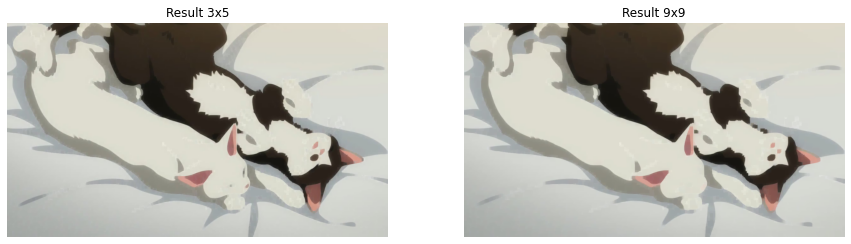

In [76]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(result1, cmap="gray")
plt.title("Result 3x5")
plt.axis('off')

plt.subplot(122)
plt.imshow(result2, cmap="gray")
plt.title("Result 9x9")
plt.axis('off')

plt.show();